In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

from pylab import rcParams
#from plotly import tools
# import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# 导入并观察数据

In [2]:
# 读取数据
data = pd.read_csv("./dataset/dataset.csv", index_col = 0)

In [3]:
data = data.drop('meanpressure', axis = 1)

In [4]:
# 显示数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
meantemp      1462 non-null float64
humidity      1462 non-null float64
wind_speed    1462 non-null float64
dtypes: float64(3)
memory usage: 45.7+ KB


In [5]:
# 显示数据前10行
data.head(10)

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
2013-01-06,7.000000,82.800000,1.480000
2013-01-07,7.000000,78.600000,6.300000
2013-01-08,8.857143,63.714286,7.142857
2013-01-09,14.000000,51.250000,12.500000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000


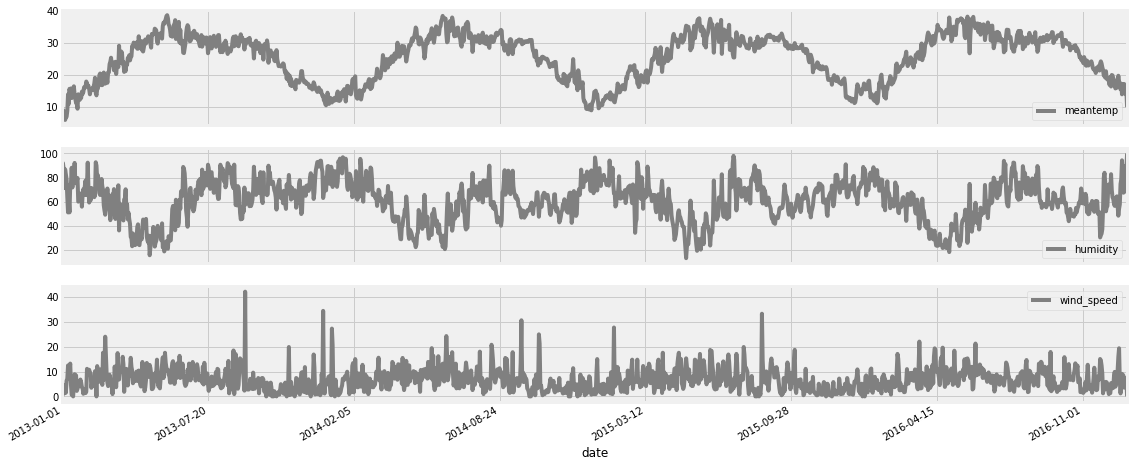

In [16]:
data.plot(subplots=True,color='gray', figsize = (17,8)) 
plt.show()

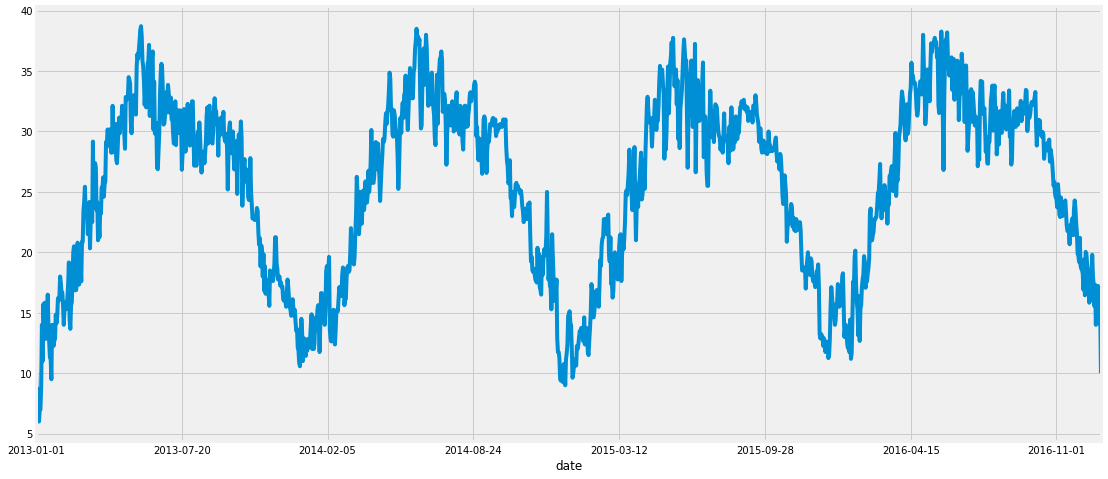

In [17]:
data['meantemp'].plot(figsize=(17,8))
plt.show()

In [18]:
meantemp_data = data['meantemp']
meantemp_data

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

# 时间序列分解

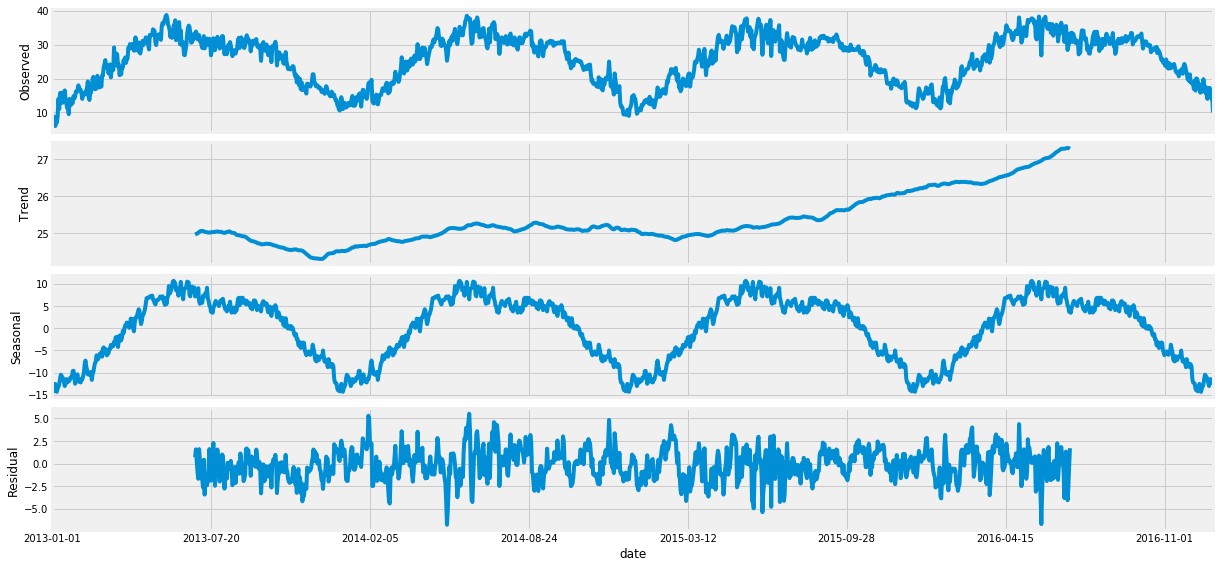

In [19]:
rcParams['figure.figsize'] = 17, 8
meantemp_data_volume = sm.tsa.seasonal_decompose(meantemp_data,freq=360) # 频率为一年
figure = meantemp_data_volume.plot()
plt.show()

# 时间序列数据类型

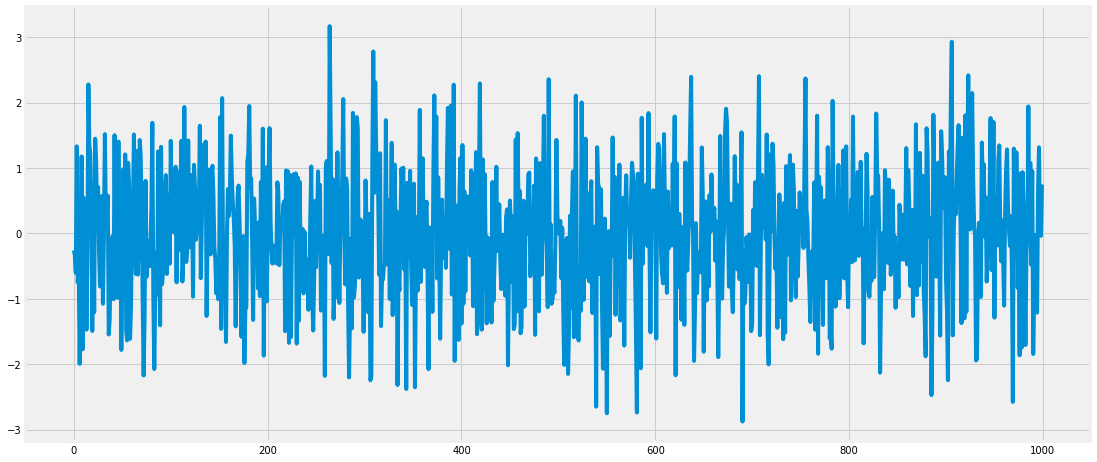

In [20]:
rcParams['figure.figsize'] = 17, 8
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc是均值，scale是方差
plt.plot(white_noise)

平均温度曲线

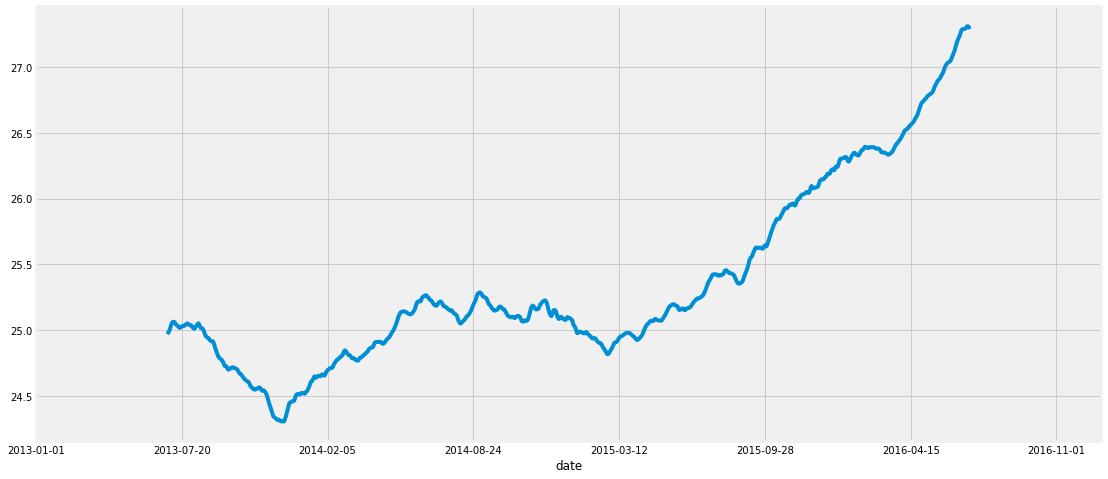

In [21]:
meantemp_data_volume = sm.tsa.seasonal_decompose(meantemp_data,freq=360) # 频率为一年
meantemp_data_trend = meantemp_data_volume.trend
meantemp_data_trend.plot()

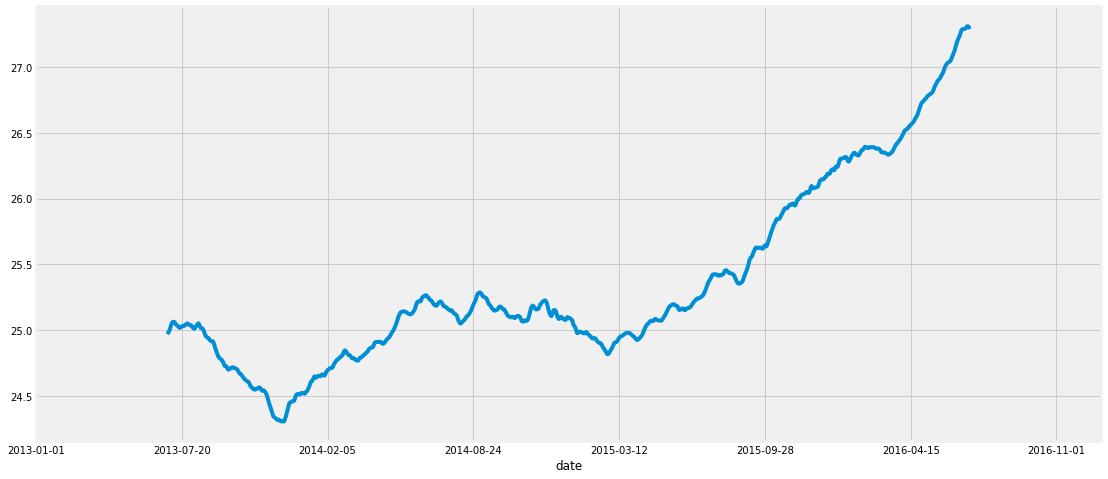

In [13]:
meantemp_data_volume.trend.plot()

In [23]:
humidity_data = data['humidity']
humidity_data

date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64

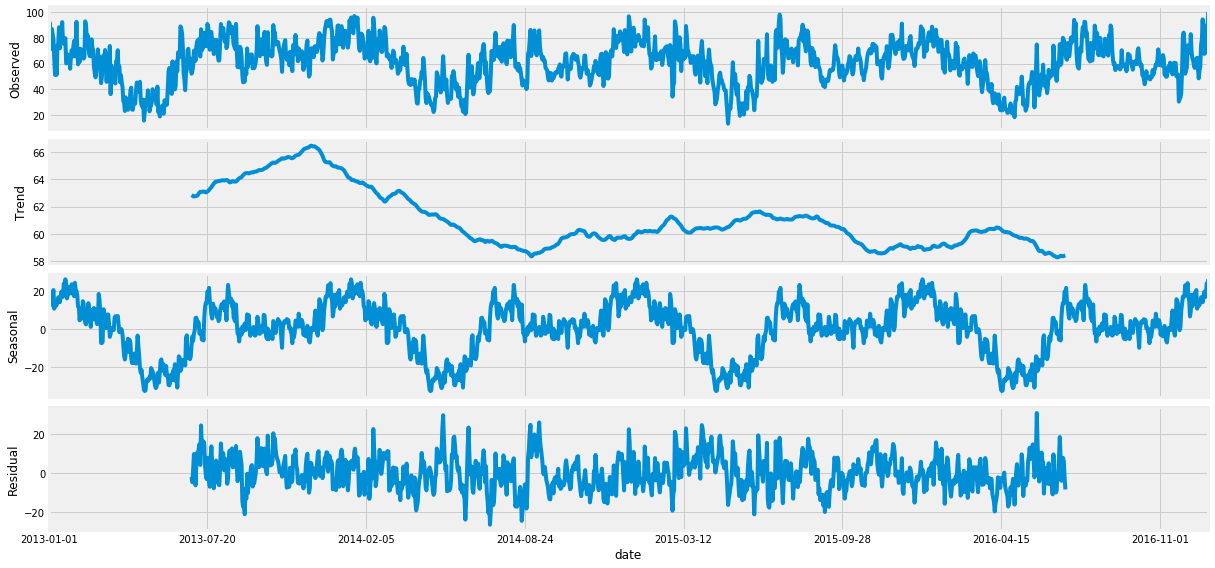

In [24]:
rcParams['figure.figsize'] = 17, 8
humidity_data_volume = sm.tsa.seasonal_decompose(humidity_data,freq=360) # 频率为一年
figure = humidity_data_volume.plot()
plt.show()

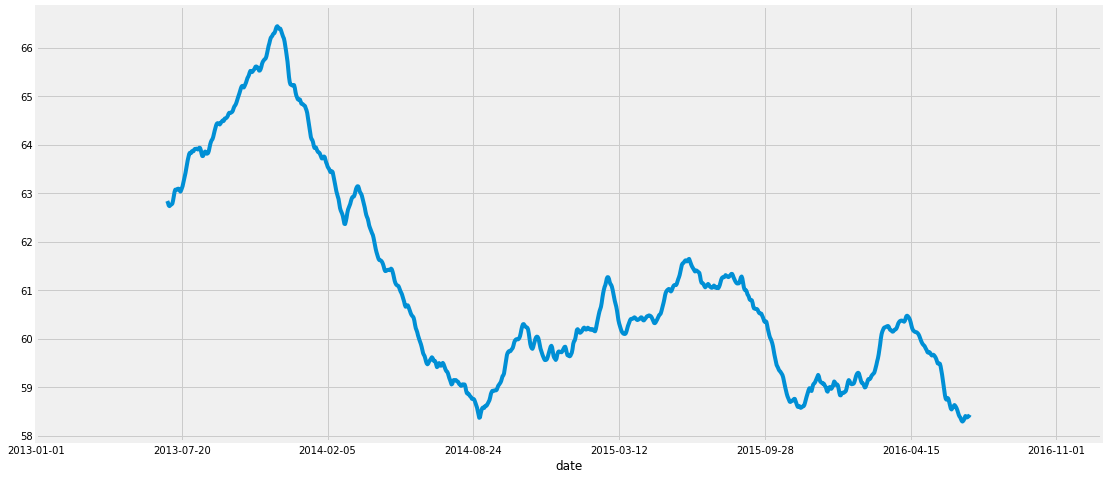

In [25]:
humidity_data_volume = sm.tsa.seasonal_decompose(humidity_data,freq=360) 
humidity_data_trend = humidity_data_volume.trend
humidity_data_trend.plot()

In [26]:
wind_speed_data = data['wind_speed']
wind_speed_data

date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

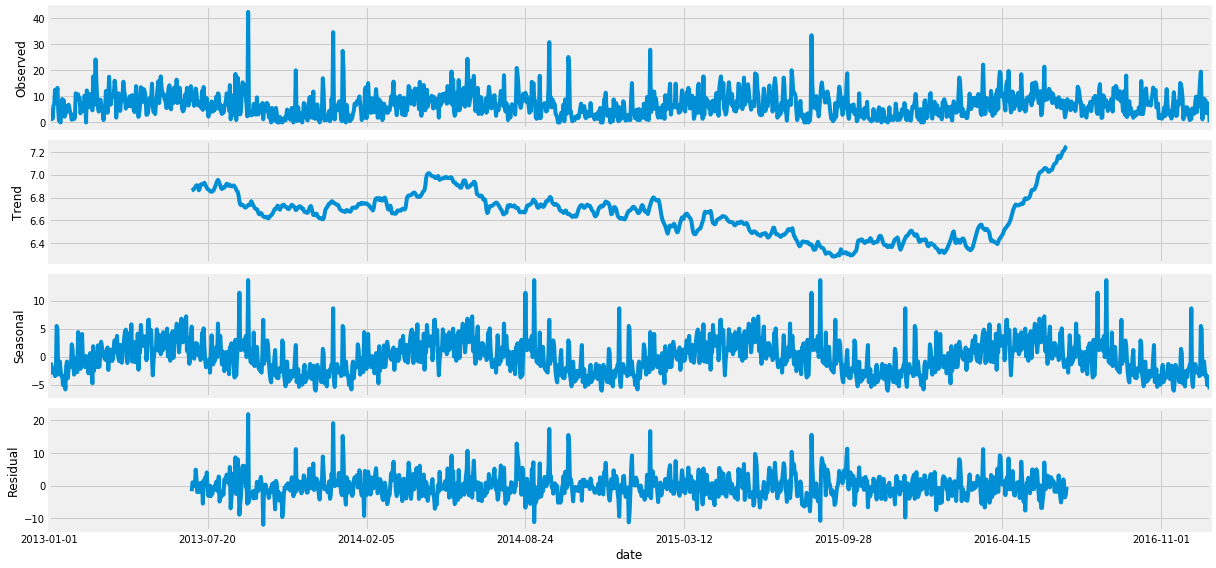

In [27]:
rcParams['figure.figsize'] = 17, 8
wind_speed_data_volume = sm.tsa.seasonal_decompose(wind_speed_data,freq=360) # 频率为一年
figure = wind_speed_data_volume.plot()
plt.show()

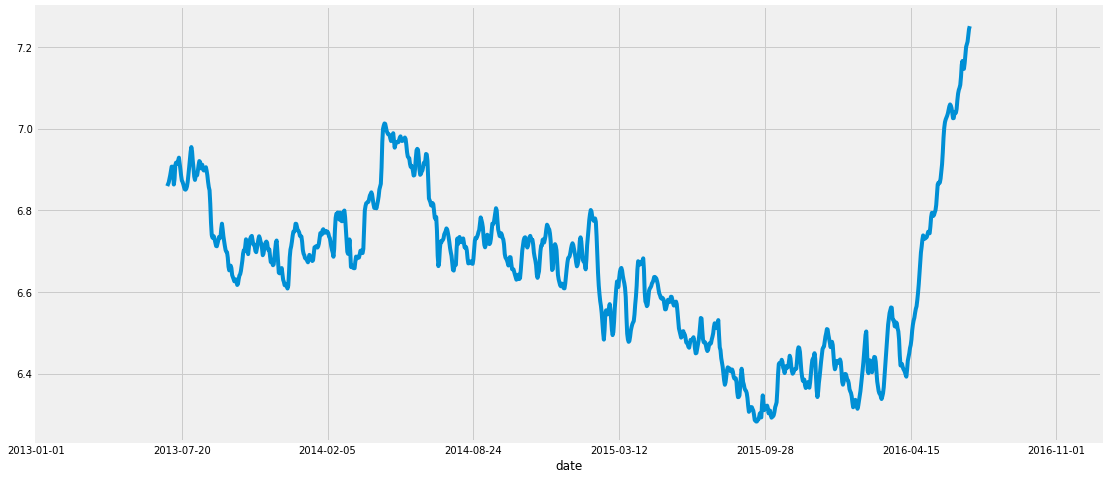

In [28]:
wind_speed_data_volume = sm.tsa.seasonal_decompose(wind_speed_data,freq=360)
wind_speed_data_trend = wind_speed_data_volume.trend
wind_speed_data_volume.trend.plot()

# 判断平稳性

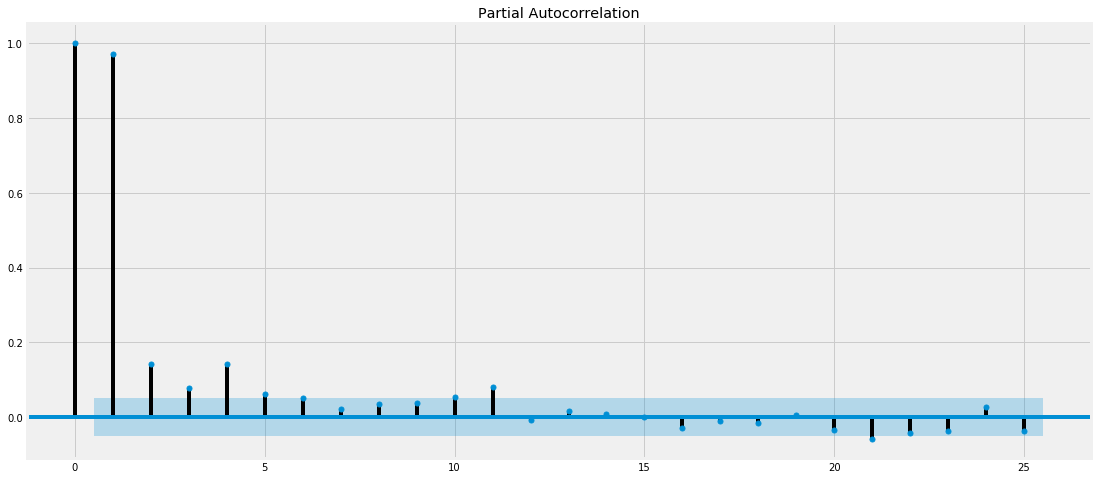

In [29]:
plot_pacf(meantemp_data,lags=25)
plt.show()

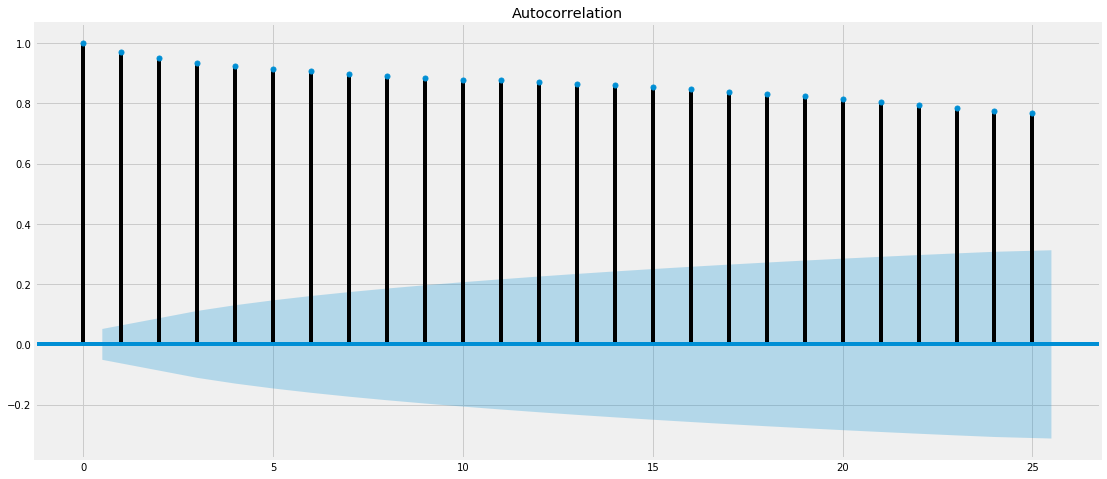

In [30]:
plot_acf(meantemp_data,lags=25)
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
dftest = adfuller(meantemp_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


# 数据预处理

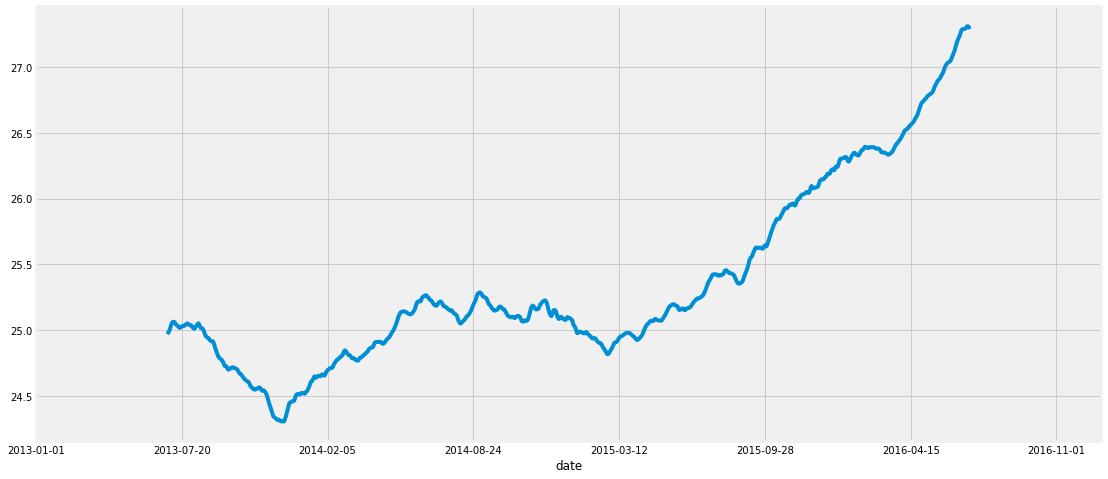

In [33]:
meantemp_data_volume.trend.plot()

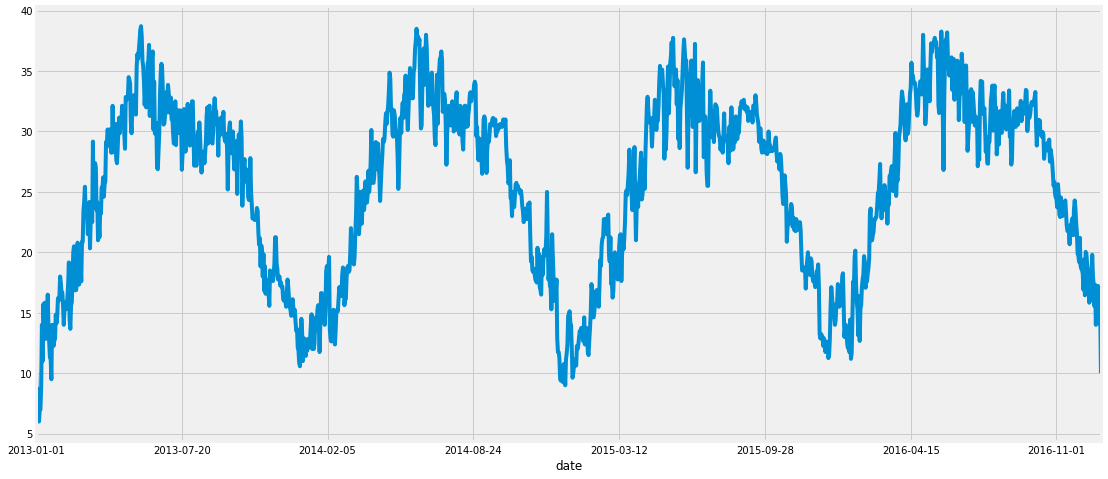

In [34]:
meantemp_data.plot()

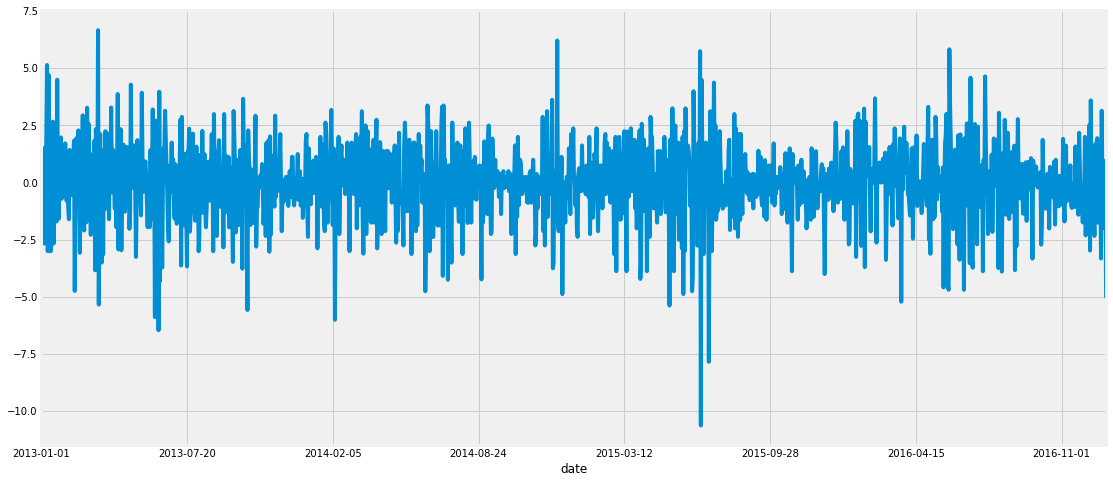

In [36]:
meantemp_data_diff = meantemp_data.diff()
meantemp_data_diff.plot()

In [38]:
meantemp_data_diff = meantemp_data_diff.dropna()
dftest = adfuller(meantemp_data_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -1.637872e+01
p-value                        2.764863e-29
#Lags Used                     9.000000e+00
Number of Observations Used    1.451000e+03
Critical Value (1%)           -3.434865e+00
Critical Value (5%)           -2.863534e+00
Critical Value (10%)          -2.567832e+00
dtype: float64


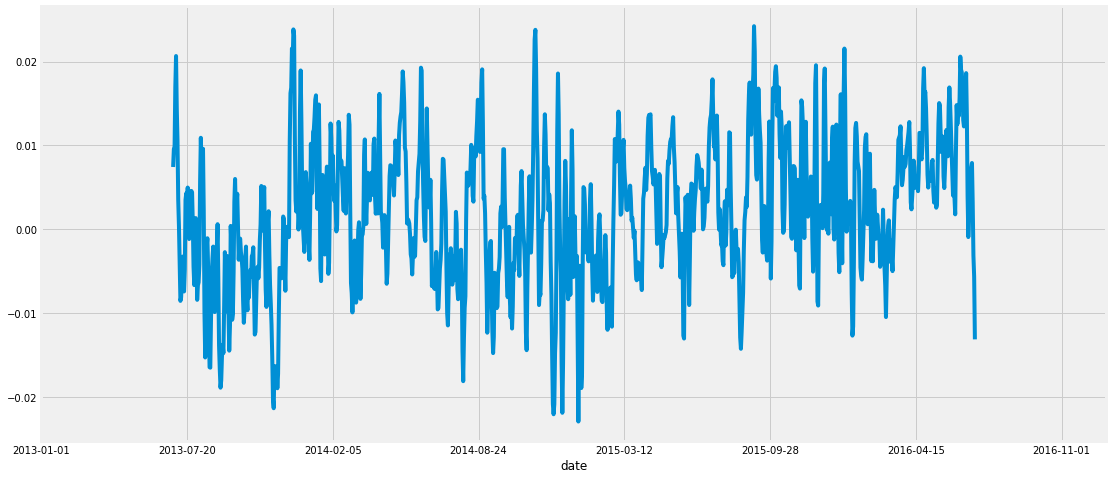

In [17]:
meantemp_data_volume.trend.diff().plot()

In [85]:
meantemp_diff_trend_data = meantemp_data_volume.trend.diff().dropna()
dftest = adfuller(meantemp_diff_trend_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -5.269907
p-value                           0.000006
#Lags Used                       22.000000
Number of Observations Used    1078.000000
Critical Value (1%)              -3.436431
Critical Value (5%)              -2.864225
Critical Value (10%)             -2.568200
dtype: float64


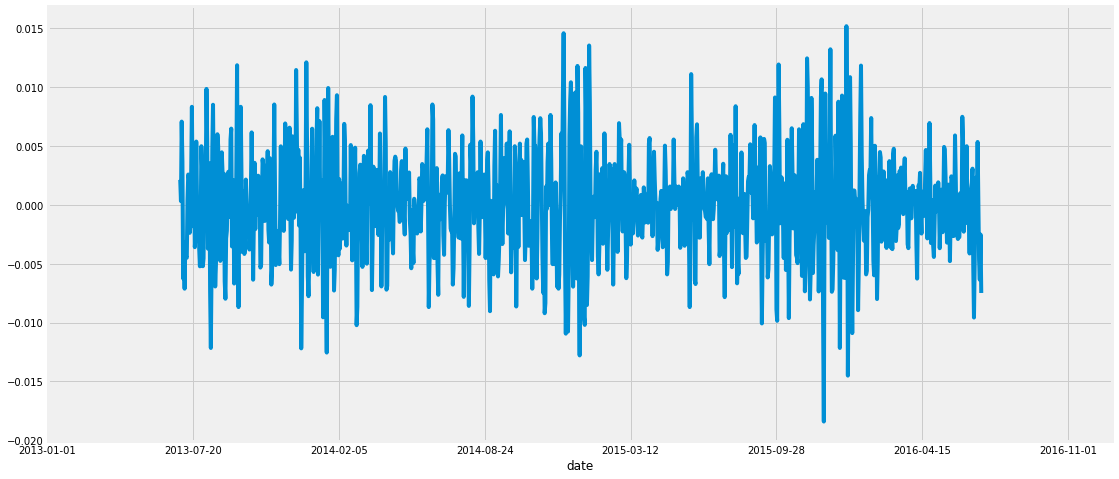

In [18]:
meantemp_data_volume.trend.diff().diff().plot()

# 数据可视化

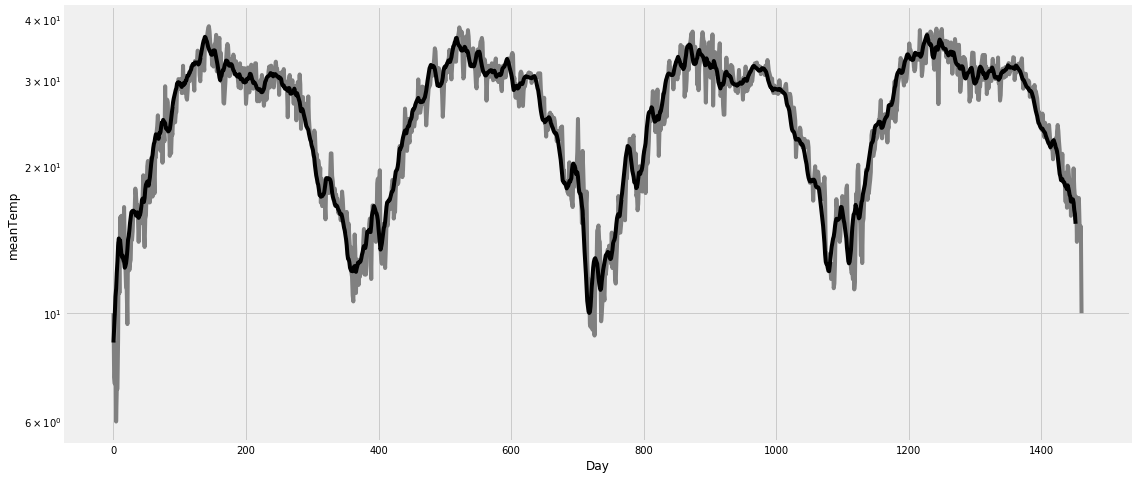

In [19]:
window = 10
days = [r for r in range(meantemp_data.shape[0])]
fig, ax = plt.subplots(figsize = (17,8))
plt.ylabel('meanTemp')
plt.xlabel('Day')

ax.plot(days,meantemp_data.values,color='grey')
ax.plot(np.convolve(meantemp_data, 
                    np.ones((window,))/window, 
                    mode='valid'),color='black')
ax.set_yscale('log')

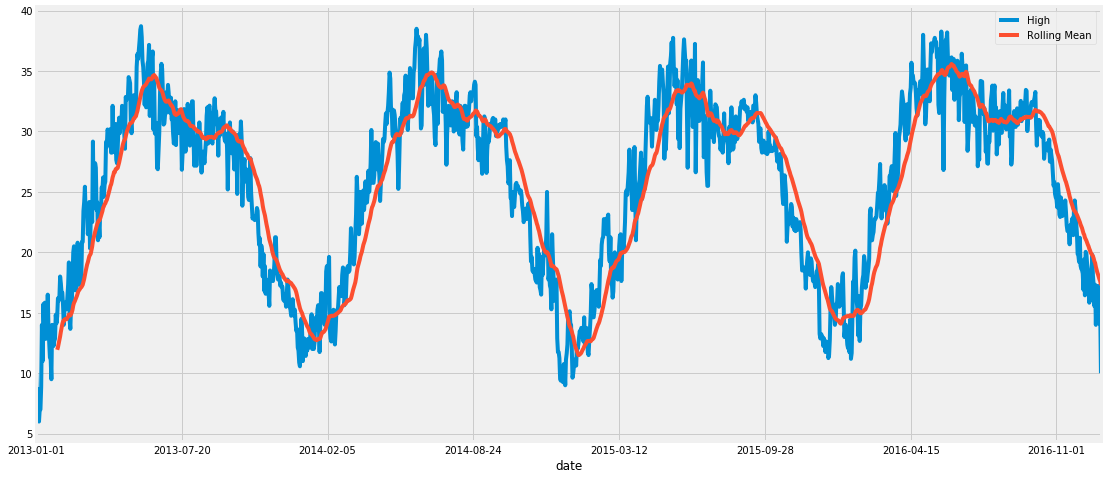

In [20]:
# 滑动窗口
rolling_meantemp_data = meantemp_data.rolling(window=30).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

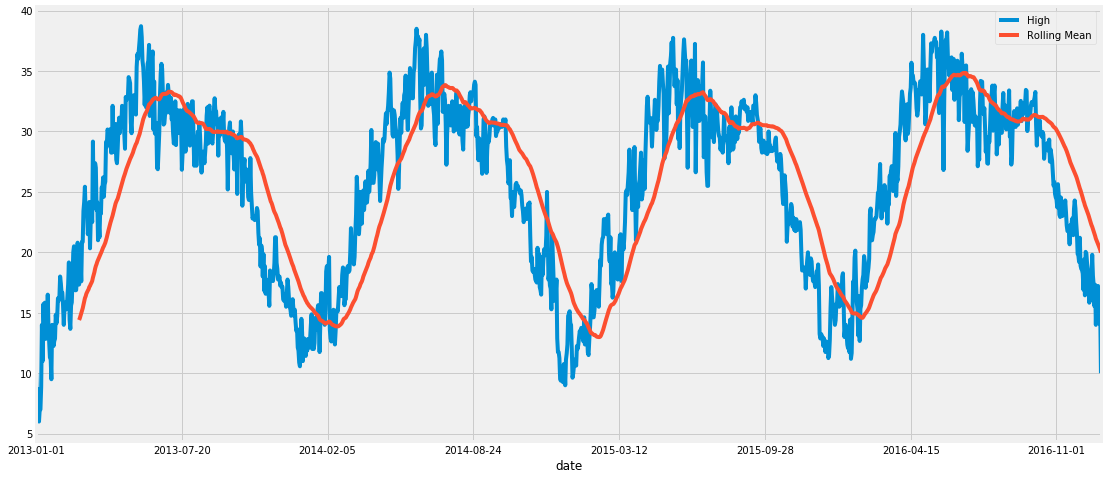

In [21]:
rolling_meantemp_data = meantemp_data.rolling(window=60).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

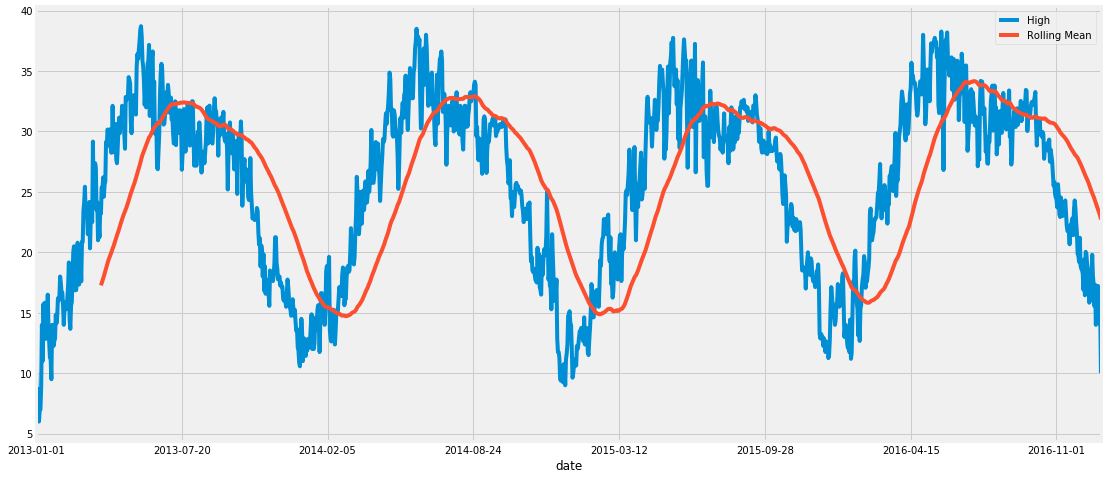

In [22]:
rolling_meantemp_data = meantemp_data.rolling(window=90).mean()
meantemp_data.plot(figsize = (17,8))
rolling_meantemp_data.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

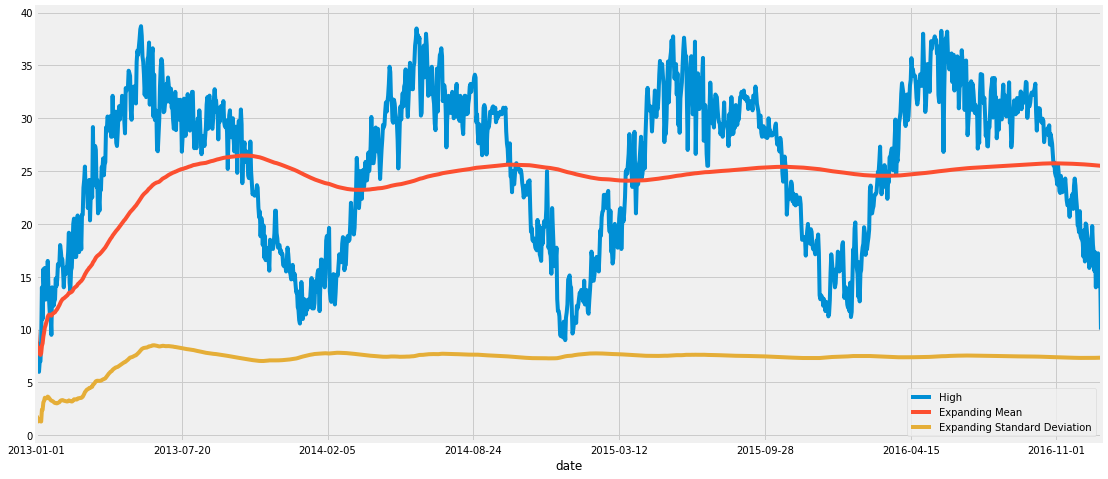

In [23]:
meantemp_data_mean = meantemp_data.expanding().mean()
meantemp_data_std = meantemp_data.expanding().std()
meantemp_data.plot(figsize = (17,8))
meantemp_data_mean.plot()
meantemp_data_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

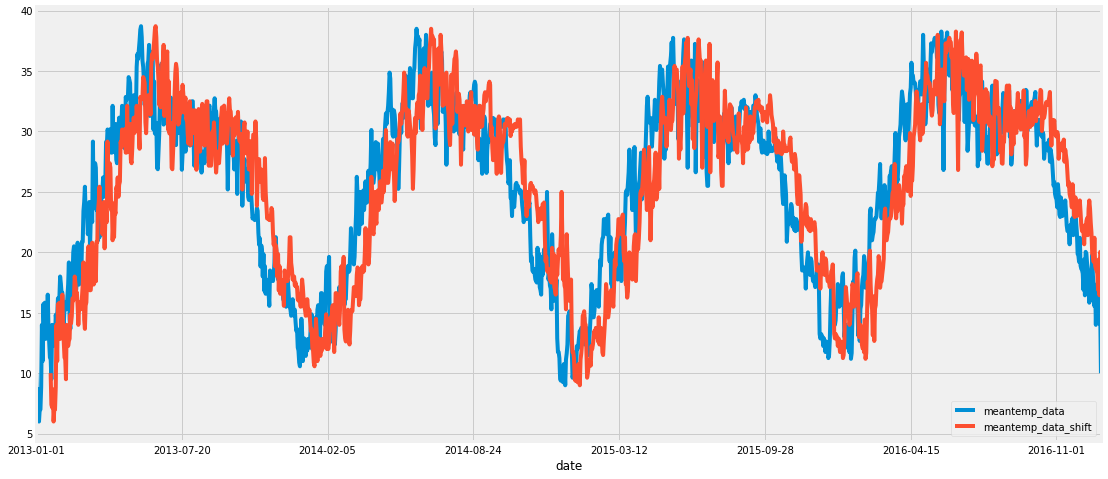

In [24]:
meantemp_data.plot(legend=True)
shifted = meantemp_data.shift(20).plot(legend=True)
shifted.legend(['meantemp_data','meantemp_data_shift'])
plt.show()

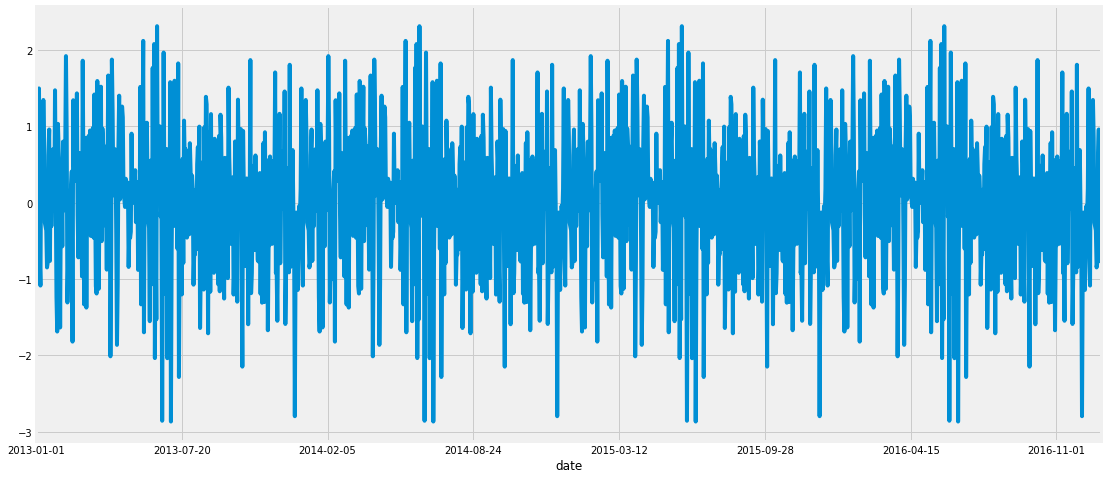

In [25]:
meantemp_data_volume.seasonal.diff().plot()

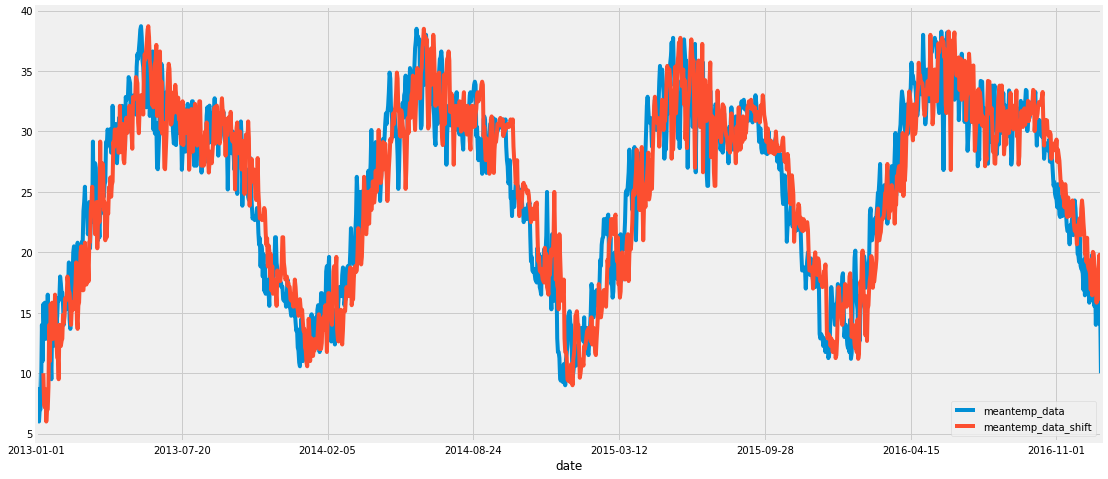

In [26]:
# 滞后图
meantemp_data.plot(legend=True)
shifted = meantemp_data.shift(10).plot(legend=True)
shifted.legend(['meantemp_data','meantemp_data_shift'])
plt.show()

# 模型

## AR

In [27]:
meantemp_data.isnull().sum()

0

In [28]:
meantemp_data_diff = meantemp_data.diff()

In [29]:
meantemp_data_diff = meantemp_data_diff.fillna(method = "ffill")
meantemp_data_diff = meantemp_data_diff.fillna(method = "bfill")
meantemp_data_diff.isnull().sum()

0

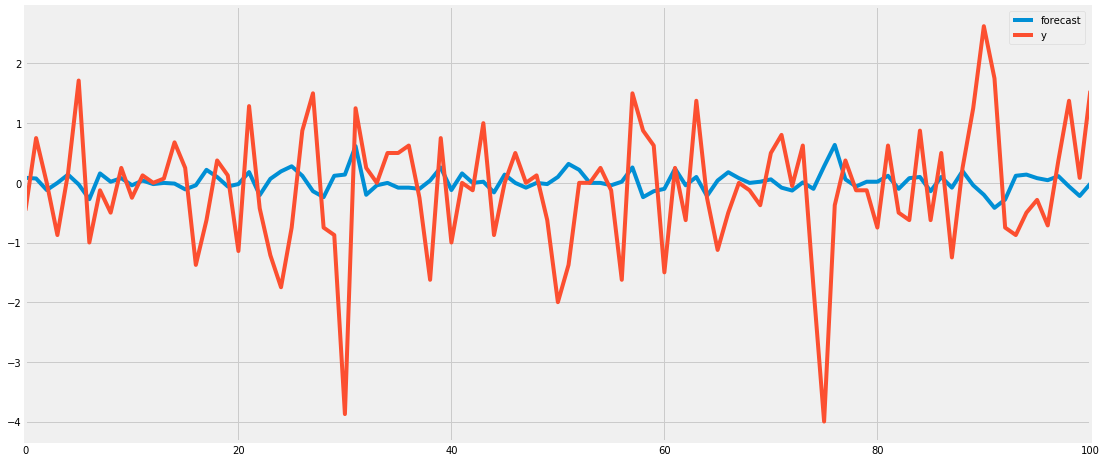

In [30]:
# 预测蒙特利尔的湿度
AR_meantemp = ARMA(meantemp_data_diff.values, order=(1,0))
res = AR_meantemp.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

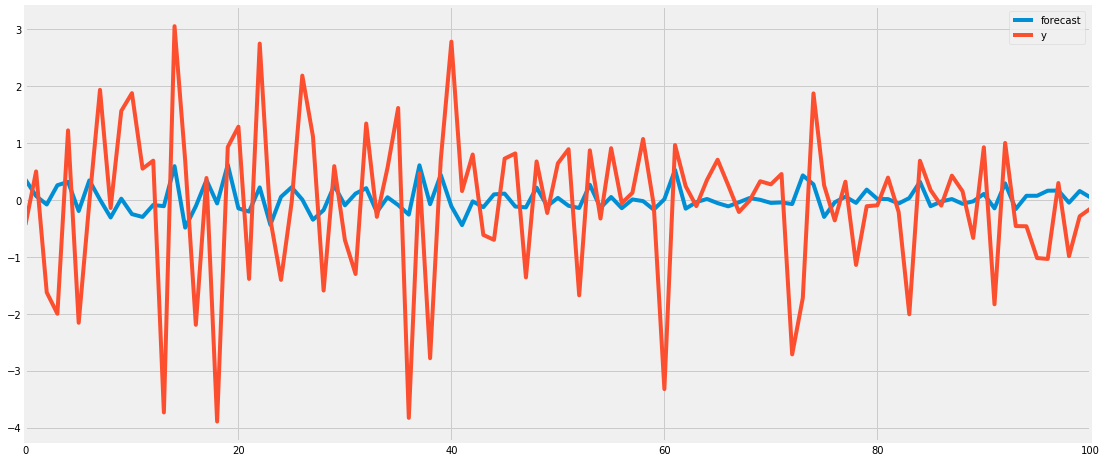

In [31]:
res.plot_predict(start=1300, end=1400)
plt.show()

## MA

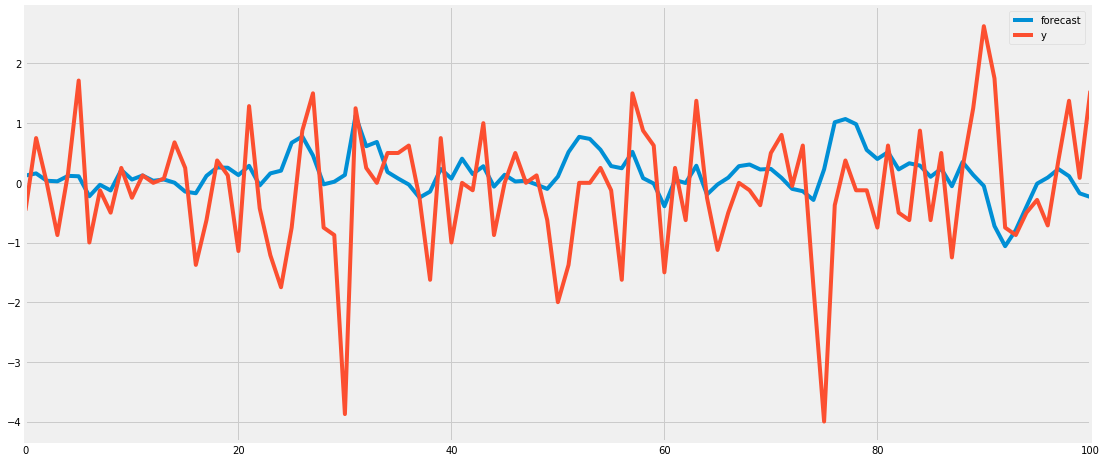

In [32]:
model = ARMA(meantemp_data_diff.values, order=(0,3))
result = model.fit()
result.plot_predict(start=1000, end=1100)
plt.show()

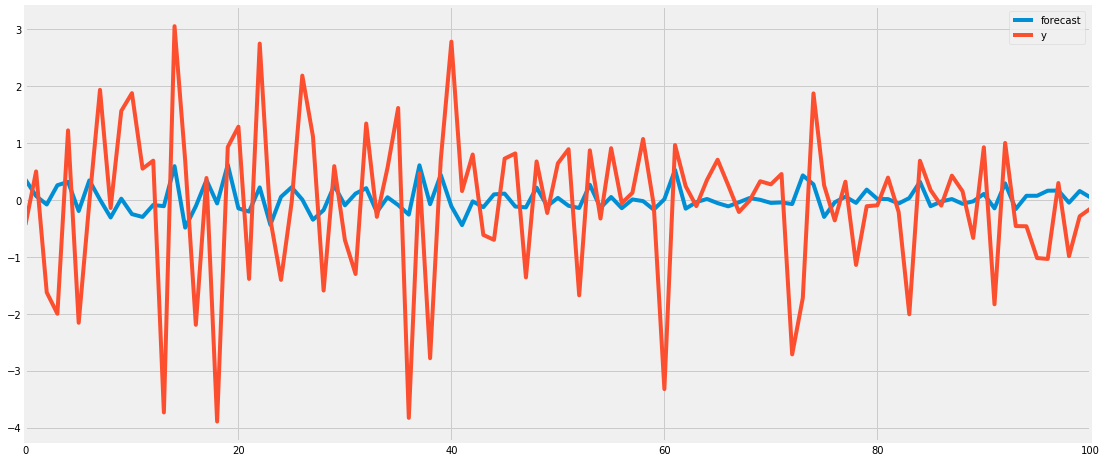

In [33]:
res.plot_predict(start=1300, end=1400)
plt.show()

## ARMA

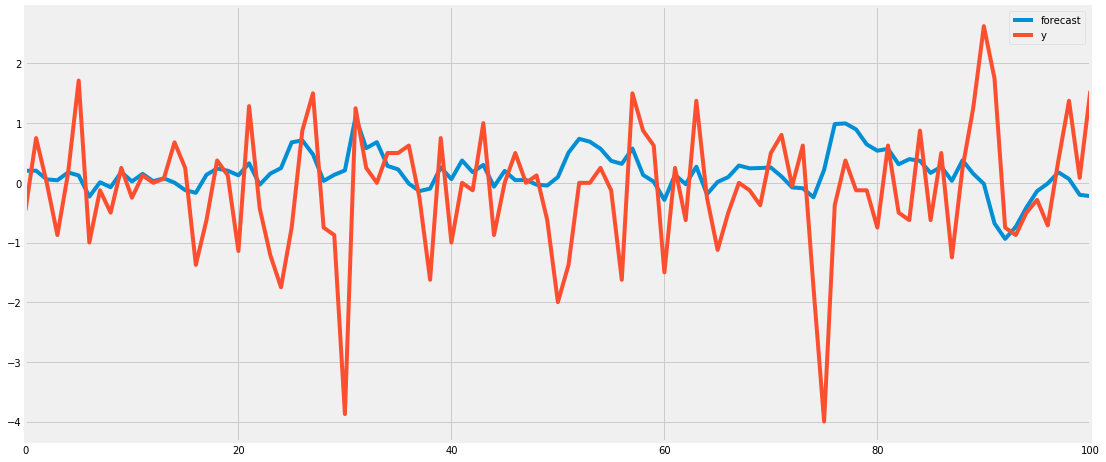

In [34]:
model = ARMA(meantemp_data_diff.values, order=(3,3))
result = model.fit()
result.plot_predict(start=1000, end=1100)
plt.show()

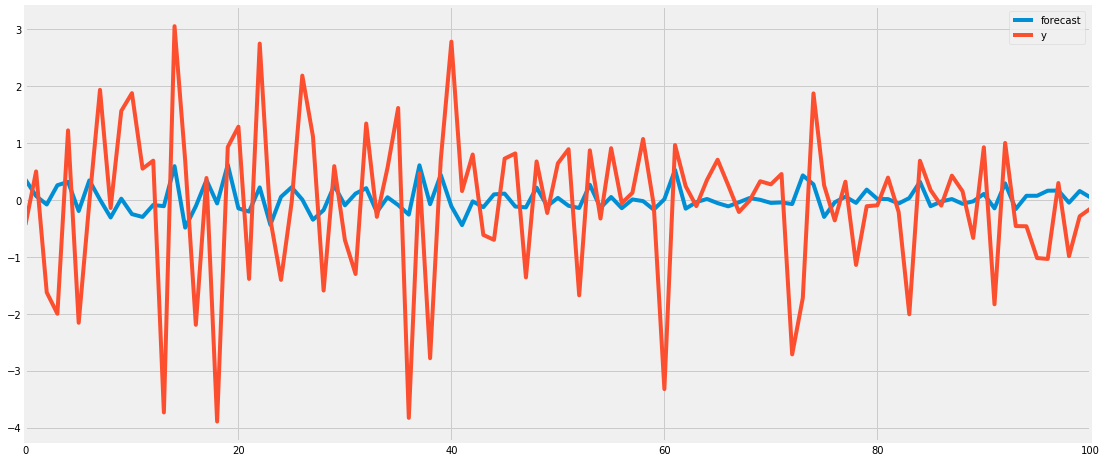

In [35]:
res.plot_predict(start=1300, end=1400)
plt.show()

## ARIMA

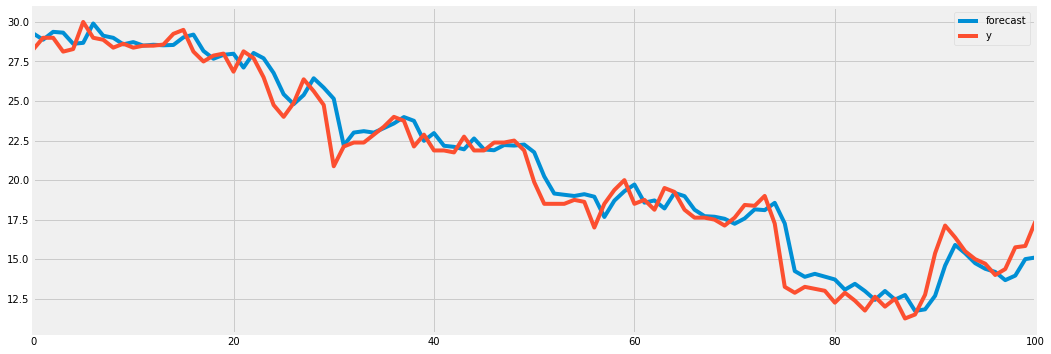

In [87]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(meantemp_data.values, order=(2,1,2))
result = model.fit()
result.plot_predict(start=1000, end=1100)
plt.show()

# SARIMA

In [39]:
rcParams['figure.figsize'] = 16, 6
model = sm.tsa.statespace.SARIMAX(meantemp_data.values, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
result = model.fit(disp=-1)
r = result.predict(start=1000, end=1100)
len(r)

101

In [40]:
a = meantemp_data[1000:1101]
a

date
2015-09-28    28.250000
2015-09-29    29.000000
2015-09-30    29.000000
2015-10-01    28.125000
2015-10-02    28.285714
                ...    
2016-01-02    14.000000
2016-01-03    14.375000
2016-01-04    15.750000
2016-01-05    15.833333
2016-01-06    17.375000
Name: meantemp, Length: 101, dtype: float64

In [41]:
comparison = pd.DataFrame({'actual': a.values,
                          'predicted': r}, 
                          index = pd.date_range(start='2015-09-28', periods=101,))


comparison

,actual,predicted
2015-09-28,28.250000,28.886140
2015-09-29,29.000000,28.337157
2015-09-30,29.000000,29.065008
2015-10-01,28.125000,29.085338
2015-10-02,28.285714,28.630405
...,...,...
2016-01-02,14.000000,14.521158
2016-01-03,14.375000,14.105051
2016-01-04,15.750000,14.390389
2016-01-05,15.833333,15.615193


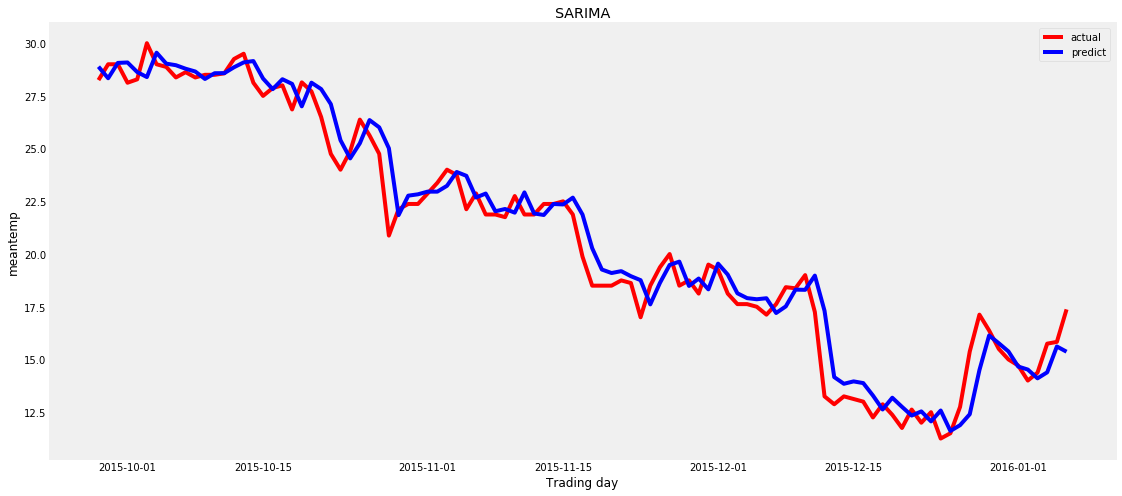

In [42]:
#Plot predicted vs actual

plt.figure(figsize=(17, 8))
plt.plot(comparison.actual, c = 'r')
plt.plot(comparison.predicted, c='b')
plt.title('SARIMA')
plt.ylabel('meantemp')
plt.xlabel('Trading day')
plt.legend(['actual', 'predict'],loc='best')
plt.grid(False)
plt.show()

## 机器学习

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [44]:
meantemp_data.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

In [45]:
meantemp_data.columns = ['data', 'meantemp']

In [46]:
meantemp_data.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

In [47]:
y = meantemp_data[1:]
y.head()

date
2013-01-02    7.400000
2013-01-03    7.166667
2013-01-04    8.666667
2013-01-05    6.000000
2013-01-06    7.000000
Name: meantemp, dtype: float64

In [48]:
y = y.values
y

array([ 7.4       ,  7.16666667,  8.66666667, ..., 14.0952381 ,
       15.05263158, 10.        ])

In [49]:
index = meantemp_data.index
index = index[:-1]

In [50]:
len(y)

1461

In [51]:
type(y)

numpy.ndarray

In [52]:
traget = pd.DataFrame(y, index = index)
traget

,0
date,
2013-01-01,7.400000
2013-01-02,7.166667
2013-01-03,8.666667
2013-01-04,6.000000
2013-01-05,7.000000
...,...
2016-12-27,17.217391
2016-12-28,15.238095
2016-12-29,14.095238


In [53]:
train_data = pd.concat([meantemp_data, traget],axis=1)
train_data.head()

,meantemp,0
2013-01-01,10.000000,7.400000
2013-01-02,7.400000,7.166667
2013-01-03,7.166667,8.666667
2013-01-04,8.666667,6.000000
2013-01-05,6.000000,7.000000


In [54]:
train_data.columns = ['meantemp', 'target']
train_data.tail()

,meantemp,target
2016-12-28,17.217391,15.238095
2016-12-29,15.238095,14.095238
2016-12-30,14.095238,15.052632
2016-12-31,15.052632,10.000000
2017-01-01,10.000000,NaN


In [55]:
train_data.drop(index=["2017-01-01"],inplace=True)
train_data

,meantemp,target
2013-01-01,10.000000,7.400000
2013-01-02,7.400000,7.166667
2013-01-03,7.166667,8.666667
2013-01-04,8.666667,6.000000
2013-01-05,6.000000,7.000000
...,...,...
2016-12-27,16.850000,17.217391
2016-12-28,17.217391,15.238095
2016-12-29,15.238095,14.095238
2016-12-30,14.095238,15.052632


In [56]:
train_data_old = train_data

In [57]:
train_data = train_data[:1400]
test_data = train_data_old[1400:]

In [58]:
x_train = train_data['meantemp']
y_train = train_data['target']

x_test = test_data['meantemp']
y_test = test_data['target']

In [59]:
x_train.shape

(1400,)

In [60]:
y_train.shape

(1400,)

In [61]:
x_test.shape

(61,)

In [62]:
y_test.shape

(61,)

In [63]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
predict = lr.predict(x_test.values.reshape(-1,1))
predict

array([24.43176431, 23.79238198, 25.65284852, 24.85020956, 23.19721226,
       23.01293008, 24.58820893, 23.79578295, 23.08498026, 23.58933149,
       23.97984344, 23.60872961, 24.34585833, 23.42167627, 22.34574545,
       21.88783887, 21.85042821, 21.85042821, 20.81539972, 22.35547223,
       21.66337487, 22.67543189, 22.91581898, 21.54917388, 23.66858668,
       24.34373921, 23.70395677, 22.55442896, 21.73403946, 20.04007718,
       19.92377879, 19.39691188, 21.34226663, 19.09700303, 18.8405699 ,
       18.74534274, 18.46476273, 17.15164828, 19.599553  , 16.7085397 ,
       20.20747636, 20.07852292, 19.24290463, 18.76196971, 18.38370629,
       16.11412575, 17.7352547 , 16.35729509, 18.08263948, 19.97241266,
       18.27022726, 17.52682384, 15.83853382, 17.55840427, 14.3308839 ,
       17.38786993, 17.10301441, 17.46036762, 15.53515112, 14.42351984,
       15.35475482])

In [65]:
len(predict)

61

In [66]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [67]:
score = cross_val_score(lr, x_train.values.reshape(-1,1), y_train, cv=10).mean()
score

0.7888856122768313

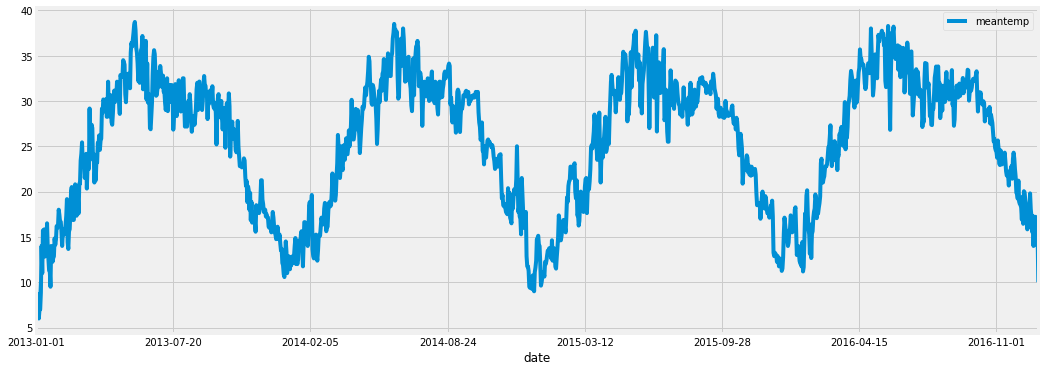

In [68]:
meantemp_data.plot(legend=True)
plt.show()

In [69]:
predict_data = pd.DataFrame(predict, index = test_data.index)
predict_data.columns = ['predict']
predict_data

,predict
2016-11-01,24.431764
2016-11-02,23.792382
2016-11-03,25.652849
2016-11-04,24.850210
2016-11-05,23.197212
...,...
2016-12-27,17.103014
2016-12-28,17.460368
2016-12-29,15.535151
2016-12-30,14.423520


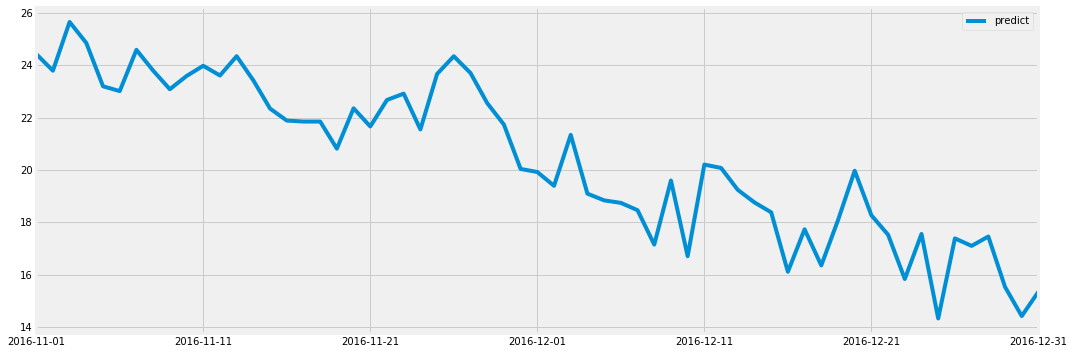

In [70]:
predict_data.plot(legend=True)
plt.show()

In [71]:
final_data = pd.concat([x_test, predict_data],axis=1)
final_data

,meantemp,predict
2016-11-01,24.384615,24.431764
2016-11-02,23.727273,23.792382
2016-11-03,25.640000,25.652849
2016-11-04,24.814815,24.850210
2016-11-05,23.115385,23.197212
...,...,...
2016-12-27,16.850000,17.103014
2016-12-28,17.217391,17.460368
2016-12-29,15.238095,15.535151
2016-12-30,14.095238,14.423520


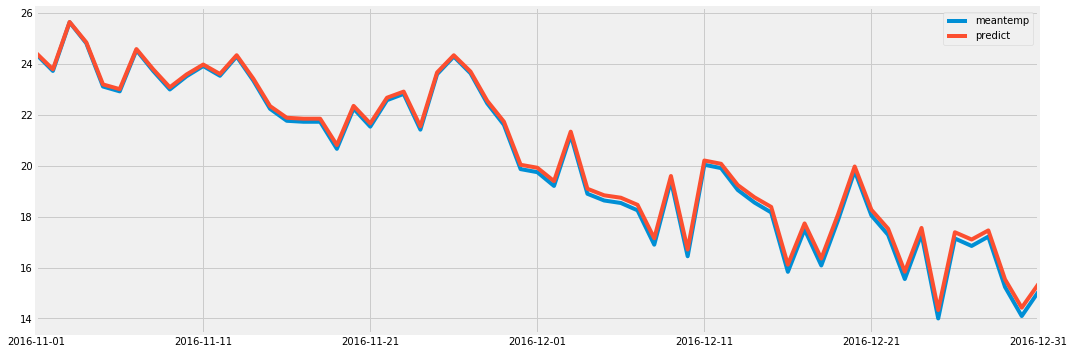

In [72]:
final_data.plot(legend=True)
plt.show()